# **Exploratory Data Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [27]:
# Import the training file
df_train = pd.read_parquet(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/train.parquet"
)
df_test = pd.read_parquet(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/final_test.parquet"
)
# df_train = pd.read_parquet("/Users/srazjman/Python/bike_counters/data/train.parquet")

### **EDA of External Data : weather data**

In [3]:
weather = pd.read_csv(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/weather_data.csv.gz",
    parse_dates=["AAAAMMJJHH"],
    date_format="%Y%m%d%H",
    compression="gzip",
    sep=";",
).rename(columns={"AAAAMMJJHH": "date"})

In [4]:
weather.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,date,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 00:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 01:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 02:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 03:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 04:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather.shape

(156599, 204)

In [6]:
# Filter weather data to only include rows relevant to the train and test set
weather = weather[
    (weather["date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (weather["date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [7]:
weather.shape

(58246, 204)

In [8]:
weather.nunique()

NUM_POSTE      6
NOM_USUEL      6
LAT            5
LON            5
ALTI           5
              ..
QTLAGON        0
TVEGETAUX      0
QTVEGETAUX     0
ECOULEMENT     0
QECOULEMENT    0
Length: 204, dtype: int64

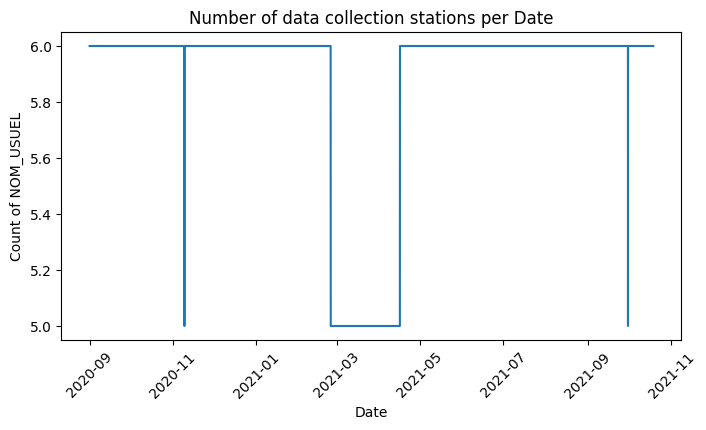

In [9]:
# check the number of stations :
plt.figure(figsize=(8, 4))
plt.plot(weather.groupby("date")["NOM_USUEL"].count(), linestyle="-")
plt.title("Number of data collection stations per Date")
plt.xlabel("Date")
plt.ylabel("Count of NOM_USUEL")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

#### Missing values : 

In [10]:
# 1. Some columns are full with NaN values :

# Identify columns where all values are NaN
empty_columns = weather.columns[weather.isnull().all()]

# Print the names of these columns
print(f"Columns with no values: {empty_columns.tolist()}")

Columns with no values: ['FF2', 'QFF2', 'DD2', 'QDD2', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'DXI3S', 'DHUMEC', 'QDHUMEC', 'GEOP', 'QGEOP', 'N', 'QN', 'NBAS', 'QNBAS', 'CL', 'QCL', 'CM', 'QCM', 'CH', 'QCH', 'N1', 'QN1', 'C1', 'QC1', 'B1', 'QB1', 'N2', 'QN2', 'C2', 'QC2', 'B2', 'QB2', 'N3', 'QN3', 'C3', 'QC3', 'B3', 'QB3', 'N4', 'QN4', 'C4', 'QC4', 'B4', 'QB4', 'W1', 'QW1', 'W2', 'QW2', 'SOL', 'QSOL', 'SOLNG', 'QSOLNG', 'TMER', 'QTMER', 'VVMER', 'QVVMER', 'ETATMER', 'QETATMER', 'DIRHOULE', 'QDIRHOULE', 'HVAGUE', 'QHVAGUE', 'PVAGUE', 'QPVAGUE', 'HNEIGEF', 'QHNEIGEF', 'TSNEIGE', 'QTSNEIGE', 'TUBENEIGE', 'QTUBENEIGE', 'HNEIGEFI3', 'QHNEIGEFI3', 'HNEIGEFI1', 'QHNEIGEFI1', 'ESNEIGE', 'QESNEIGE', 'CHARGENEIGE', 'QCHARGENEIGE', 'DIR', 'QDIR', 'DIR2', 'QDIR2', 'DIF', 'QDIF', 'DIF2', 'QDIF2', 'UV', 'QUV', 'UV2', 'QUV2', 'UV_INDICE', 'QUV_INDICE', 'INFRAR', 'QINFRAR', 'INFRAR2', 'QINFRAR2', 'TLAGON', 'QTLAGON', 'TVEGETAUX', 'QTVEGETAUX', 'ECOULEMENT', 'QECOULEMENT']


In [11]:
# 2. Some columns have

# Calculate the total number of missing values per column
na_counts = weather.isnull().sum()

# Filter for columns with more than 10 missing values
columns_with_na = na_counts[na_counts > 10]

# Calculate the percentage of missing values per column
na_percentage = (columns_with_na / len(weather)) * 100

# Combine counts and percentages into a DataFrame for better display
na_summary = pd.DataFrame(
    {"Number of NAs": columns_with_na, "Percentage of NAs": na_percentage}
)

# Sort the summary in descending order based on the number of missing values
na_summary = na_summary.sort_values(by="Number of NAs", ascending=True)

# Display the summary
na_summary.head(80)

,Number of NAs,Percentage of NAs
DG,34,0.058373
QDG,34,0.058373
QHTX,84,0.144216
HTN,84,0.144216
QHTN,84,0.144216
...,...,...
TN50,48335,82.984239
T10,48335,82.984239
WW,48338,82.989390
QWW,48338,82.989390


In [12]:
# Solution : we drop the columns with full NAs and we interpolate the very few missing values left :
weather_reduced = (
    weather.drop(columns=["NUM_POSTE", "NOM_USUEL", "LAT", "LON", "QDXI3S"])
    .groupby("date")
    .mean()
    .dropna(axis=1, how="all")
    .interpolate(method="linear")
)

### Statistics and distributions of the dataset : 

In [13]:
# Basic statistics of the numerical columns
numerical_columns = weather_reduced.select_dtypes(include=["float64", "int64"]).columns
df_external_numerical = weather_reduced[numerical_columns]

df_external_numerical.describe()

,ALTI,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
count,9911.000000,9911.000000,9911.0,9911.00000,9911.000000,9911.000000,9911.000000,9911.000000,9911.0,9911.000000,...,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000
mean,95.703763,0.084862,1.0,4.93825,8.908788,3.988096,1.002960,179.420005,1.0,4.842115,...,0.012915,8.874079,48.920997,8.997175,48.914136,8.996771,12.960801,8.997578,12.963071,8.997175
std,15.026301,0.489906,0.0,14.23178,0.620987,1.914488,0.088795,90.885561,0.0,2.076287,...,0.134152,0.995796,75.792628,0.106272,75.775356,0.113604,21.138612,0.098394,21.154793,0.106272
min,55.600000,0.000000,1.0,0.00000,3.000000,0.000000,1.000000,0.000000,1.0,0.350000,...,0.000000,1.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000
25%,101.333333,0.000000,1.0,0.00000,9.000000,2.500000,1.000000,110.000000,1.0,3.266667,...,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000
50%,101.333333,0.000000,1.0,0.00000,9.000000,3.850000,1.000000,196.666667,1.0,4.700000,...,0.000000,9.000000,1.000000,9.000000,1.000000,9.000000,0.000000,9.000000,0.000000,9.000000
75%,101.333333,0.000000,1.0,0.00000,9.000000,5.266667,1.000000,236.666667,1.0,6.233333,...,0.000000,9.000000,77.000000,9.000000,77.500000,9.000000,21.500000,9.000000,21.500000,9.000000
max,101.333333,20.325000,1.0,60.00000,9.000000,13.600000,3.666667,360.000000,1.0,14.900000,...,4.000000,9.000000,335.500000,9.000000,334.500000,9.000000,60.000000,9.000000,60.000000,9.000000


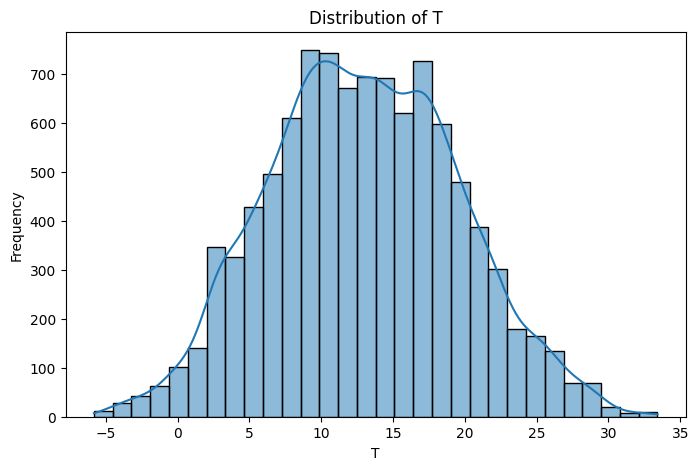

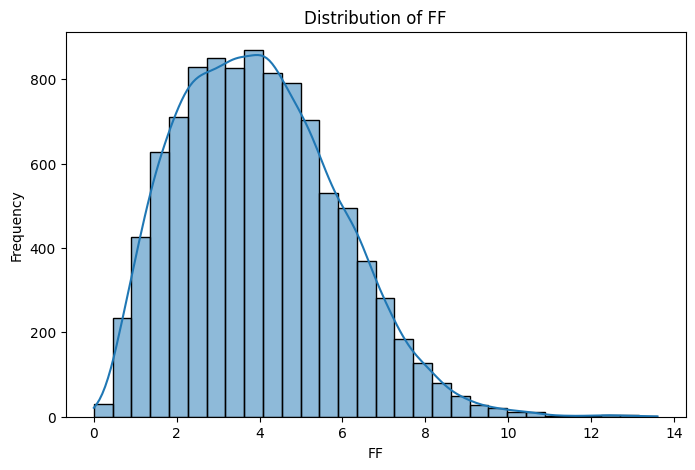

In [14]:
# for col in ['T', 'FF', 'RR24', 'ht_neige','etat_sol']:
for col in ["T", "FF"]:
    if col in df_external_numerical.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_external_numerical[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

## Correlation between the remaining weather features : (we suspect strong multicolinearity in this data set)

In [15]:
# Compute the correlation matrix
correlation_matrix = df_external_numerical.corr()

# Filter correlations greater than 0.3 and exclude diagonal (self-correlation)
correlations_above_threshold = correlation_matrix.where(
    (correlation_matrix > 0.3) & (correlation_matrix != 1)
)

# Print the filtered correlations
for col in correlations_above_threshold.columns:
    high_corrs = correlations_above_threshold[col].dropna()
    if not high_corrs.empty:
        print(f"Correlations for {col}:")
        print(high_corrs)
        print("\n")

Correlations for ALTI:
QFXI3S    0.476046
TD        0.386317
T10       0.330996
T20       0.345357
T50       0.392850
T100      0.454040
TSV       0.371733
Name: ALTI, dtype: float64


Correlations for RR1:
DRR1    0.493404
WW      0.427436
Name: RR1, dtype: float64


Correlations for DRR1:
RR1        0.493404
U          0.323350
UN         0.302680
UX         0.313412
DHUMI80    0.347108
WW         0.792864
Name: DRR1, dtype: float64


Correlations for FF:
FXY      0.958348
FXI      0.920564
FXI3S    0.884839
Name: FF, dtype: float64


Correlations for DD:
DXY    0.890741
DXI    0.851863
Name: DD, dtype: float64


Correlations for FXY:
FF       0.958348
FXI      0.959884
FXI3S    0.928610
Name: FXY, dtype: float64


Correlations for DXY:
DD     0.890741
DXI    0.896976
Name: DXY, dtype: float64


Correlations for HXY:
HXI       0.991589
HFXI3S    0.991310
HTN       0.986874
HTX       0.989315
HUN       0.988395
HUX       0.986620
Name: HXY, dtype: float64


Correlations for FXI:
FF   

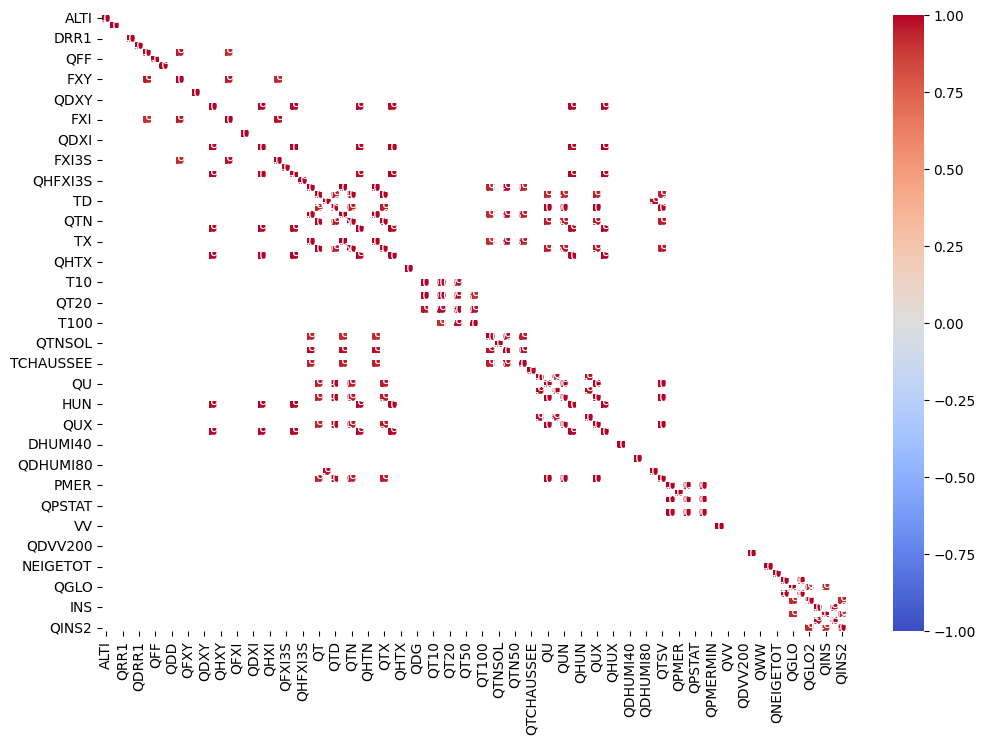

In [16]:
# Compute the correlation matrix
correlation_matrix = weather_reduced.corr()

# Filter correlations greater than absolute 0.2
filtered_correlation = correlation_matrix[(correlation_matrix.abs() > 0.9)]

# Display the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
)
plt.show()

# INTERPRETATION DU GRAPH = A REFAIRE POUR CE NEW DATA SET SI BESOIN

For multicolinarity purposes : 

- pmer and pres ultra correlated = one is function of each other. keep only one of the two 
- raf10, rafper and ff ultra correlated. we decide to keep ff and not raf10 and rafper
- t and td ultra correlated . t is temperature and td is "point de rosée". we keep t 
- tend and tend24 : we keep both
- rr1, rr3, rr6, rr12, rr24 : précipitaiton en mm : we keep them all. 
- same thing for ww, w1, w2 : temps présent, temps passé 1, temps passé 2 (soleil, pluie, neige, ....)
- cod_tend and tend : type de tendance barométrique (en texte) vs variation de pression en 3h . we remove cod and keep variation de pression en 3h : tend 
- etat_sol and ht_neige : corrrelated. 

En conclusion: we remove : pmer, raf10, rafper, td, cod


In [17]:
'''
external_data_cleaned = external_data_cleaned.drop(
    columns=["pmer", "raf10", "rafper", "td", "cod_tend"]
)
'''

'\nexternal_data_cleaned = external_data_cleaned.drop(\n    columns=["pmer", "raf10", "rafper", "td", "cod_tend"]\n)\n'

In [18]:
# external_data_cleaned.head()

## (DONE POUR NEW DATA SET = UPDATED) : Correlation analysis between weather features and our target variable, log_bike_count :

In [19]:
# We decide to merge this weather data set with the training and testing set to look at the correlation between these weather features
# and log bike count

df_train = df_train.merge(weather_reduced, left_on="date", right_on="date", how="left")


In [20]:
df_train_filtered = df_train.drop(columns=['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude'])

In [21]:
df_train_filtered.columns

Index(['log_bike_count', 'ALTI', 'RR1', 'QRR1', 'DRR1', 'QDRR1', 'FF', 'QFF',
       'DD', 'QDD', 'FXY', 'QFXY', 'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI',
       'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI3S', 'QFXI3S', 'HFXI3S', 'QHFXI3S',
       'T', 'QT', 'TD', 'QTD', 'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX',
       'QHTX', 'DG', 'QDG', 'T10', 'QT10', 'T20', 'QT20', 'T50', 'QT50',
       'T100', 'QT100', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'TCHAUSSEE',
       'QTCHAUSSEE', 'U', 'QU', 'UN', 'QUN', 'HUN', 'QHUN', 'UX', 'QUX', 'HUX',
       'QHUX', 'DHUMI40', 'QDHUMI40', 'DHUMI80', 'QDHUMI80', 'TSV', 'QTSV',
       'PMER', 'QPMER', 'PSTAT', 'QPSTAT', 'PMERMIN', 'QPMERMIN', 'VV', 'QVV',
       'DVV200', 'QDVV200', 'WW', 'QWW', 'NEIGETOT', 'QNEIGETOT', 'GLO',
       'QGLO', 'GLO2', 'QGLO2', 'INS', 'QINS', 'INS2', 'QINS2'],
      dtype='object')

In [22]:
# Calculate correlations between each feature and log_bike_count
correlations = df_train_filtered.corr()

# Extract correlations of each feature with log_bike_count
log_bike_count_corr = correlations["log_bike_count"]

# Filter correlations where absolute value is greater than 0.2
log_bike_count_corr_filtered = log_bike_count_corr[log_bike_count_corr.abs() > 0.2]

# Sort the correlations in descending order
log_bike_count_corr_sorted = log_bike_count_corr_filtered.sort_values(ascending=False)

# Display the correlations
log_bike_count_corr_sorted

log_bike_count    1.000000
GLO2              0.432508
GLO               0.430140
INS               0.418057
INS2              0.417461
TNSOL             0.392347
TN50              0.340316
TCHAUSSEE         0.330116
T                 0.317123
TX                0.310613
TN                0.296408
DHUMI80          -0.278914
UX               -0.317867
UN               -0.350243
U                -0.361715
Name: log_bike_count, dtype: float64

## PCA analysis with weather filtered

In [23]:
weather_reduced.head()

,ALTI,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
date,,,,,,,,,,,,,,,,,,,,,
2020-09-01 00:00:00,101.333333,0.0,1.0,0.0,9.0,2.566667,1.0,123.333333,1.0,2.766667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2020-09-01 01:00:00,101.333333,0.0,1.0,0.0,9.0,1.900000,1.0,123.333333,1.0,2.866667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2020-09-01 02:00:00,101.333333,0.0,1.0,0.0,9.0,1.400000,1.0,110.000000,1.0,2.033333,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2020-09-01 03:00:00,101.333333,0.0,1.0,0.0,9.0,1.100000,1.0,113.333333,1.0,1.600000,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2020-09-01 04:00:00,101.333333,0.0,1.0,0.0,9.0,1.100000,1.0,103.333333,1.0,1.366667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0


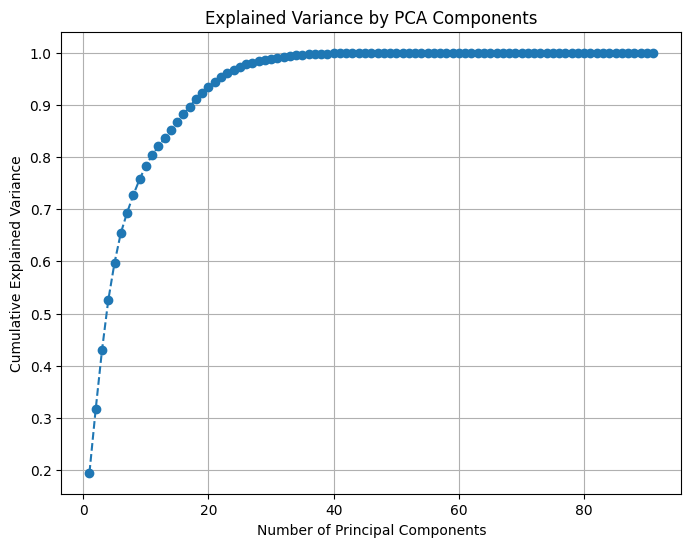

Component 1: 19.49% cumulative explained variance
Component 2: 31.71% cumulative explained variance
Component 3: 42.94% cumulative explained variance
Component 4: 52.53% cumulative explained variance
Component 5: 59.71% cumulative explained variance
Component 6: 65.39% cumulative explained variance
Component 7: 69.31% cumulative explained variance
Component 8: 72.73% cumulative explained variance
Component 9: 75.72% cumulative explained variance
Component 10: 78.32% cumulative explained variance
Component 11: 80.33% cumulative explained variance
Component 12: 82.05% cumulative explained variance
Component 13: 83.60% cumulative explained variance
Component 14: 85.14% cumulative explained variance
Component 15: 86.67% cumulative explained variance
Component 16: 88.20% cumulative explained variance
Component 17: 89.68% cumulative explained variance
Component 18: 91.06% cumulative explained variance
Component 19: 92.27% cumulative explained variance
Component 20: 93.36% cumulative explaine

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_reduced)

# Apply PCA without specifying n_components to get all components
pca = PCA()
pca.fit(weather_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Print explained variance for each component
for i, variance in enumerate(cumulative_explained_variance):
    print(f"Component {i+1}: {variance:.2%} cumulative explained variance")

In [25]:
# We decide to retain 90% of the variance :
n_components = 11  # Retain ~90% of the variance
pca = PCA(n_components=n_components)
weather_pca = pca.fit_transform(weather_scaled)

In [26]:
# Convert PCA results to a DataFrame
pca_columns = [f'pca_feature_{i+1}' for i in range(n_components)]
weather_pca_df = pd.DataFrame(weather_pca, columns=pca_columns, index=weather_reduced.index)  # Retain the 'date' index


# TO DO FOR NEW DATA SET SI BESOIN : Outlier management:
For outlier management, we will only consider numerical columns:

In [46]:
numerical_columns = external_data_cleaned.select_dtypes(
    include=["float64", "int64"]
).columns
print(external_data_cleaned[numerical_columns].describe())

              tend           dd           ff            t            u  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean     -0.237809   184.379892     3.654154   285.877905    74.775135   
std     122.191314   103.708084     2.000353     6.851700    17.022427   
min    -750.000000     0.000000     0.000000   267.650000    24.000000   
25%     -70.000000    80.000000     2.200000   280.950000    63.000000   
50%       0.000000   200.000000     3.400000   285.850000    79.000000   
75%      70.000000   260.000000     4.900000   290.650000    89.000000   
max     720.000000   360.000000    14.600000   307.450000   100.000000   

                 vv           ww           w1           w2            n  \
count   3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean   20142.338952     9.056291     2.075256     1.759783    66.377483   
std    10283.556918    18.554513     2.163255     1.709240    35.729894   
min      120.000000     0.000000 

We look for outliers and we notice for example that the variables rr3, rr6, rr12, rr24 have negative values ​​which is impossible.

Let's apply a z-score test : 

In [47]:
from scipy.stats import zscore
import numpy as np

# calcul of the z-score
z_scores = external_data_cleaned[numerical_columns].apply(zscore)

# possible outlier if: (z-score > 3 or < -3)
outliers = np.abs(z_scores) > 3

outlier_counts = outliers.sum()
print("Nombre d'outliers par colonne :\n", outlier_counts)

Nombre d'outliers par colonne :
 tend        36
dd           0
ff          20
t            2
u            0
vv          34
ww          47
w1          15
w2          27
n            0
nbas         0
pres        40
tend24      33
etat_sol    52
ht_neige    48
rr1         47
rr3         66
rr6         71
rr12        74
rr24        82
dtype: int64


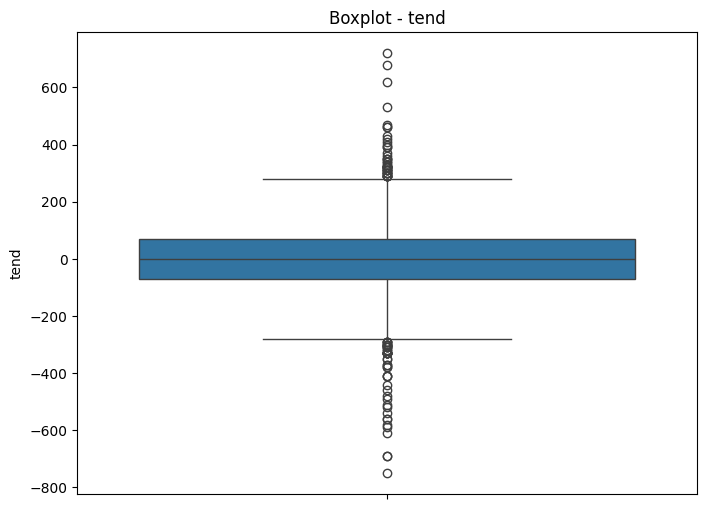

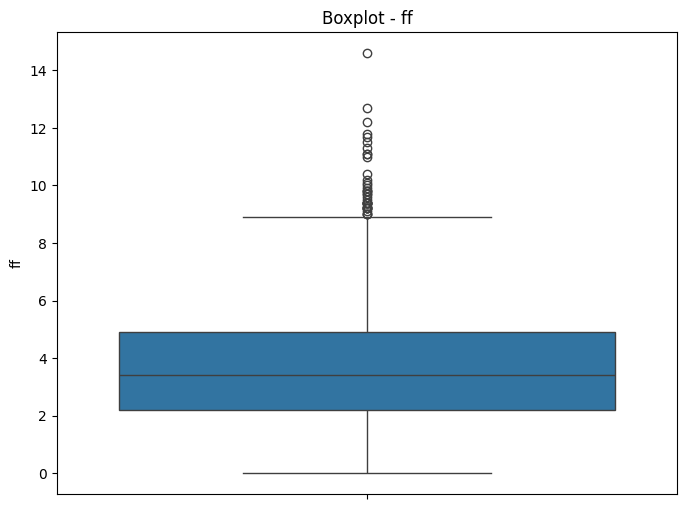

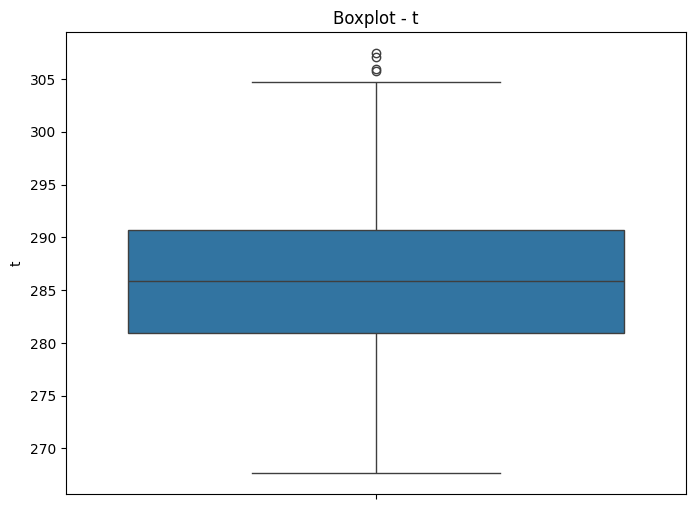

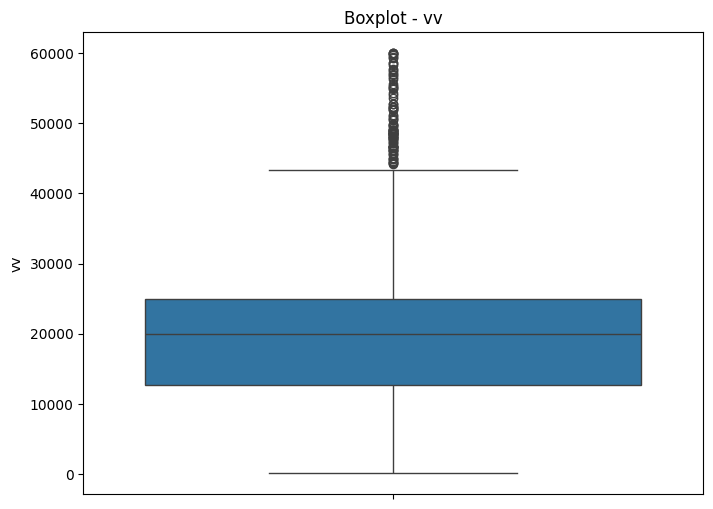

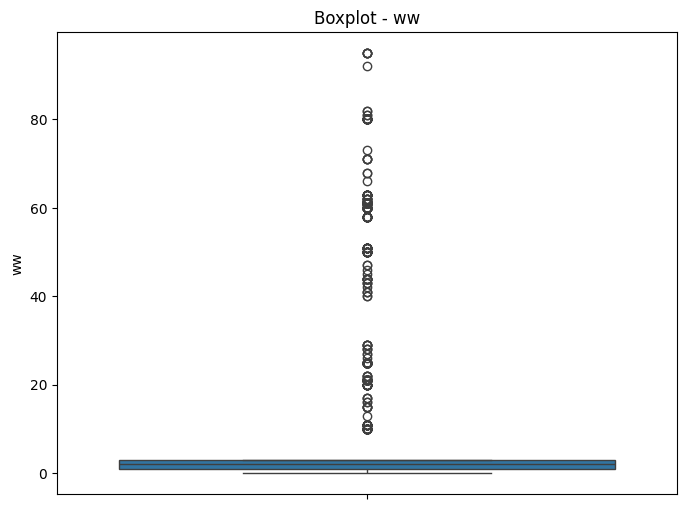

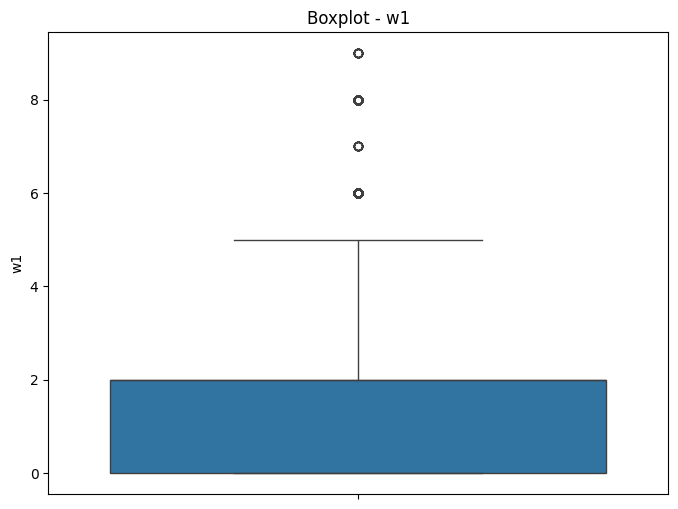

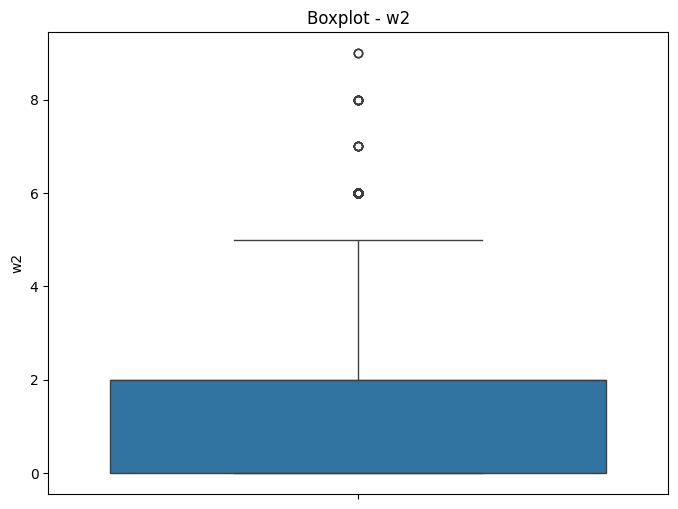

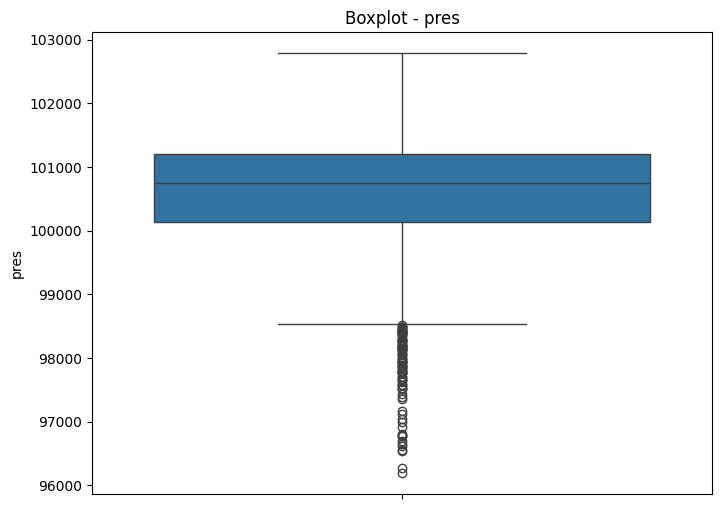

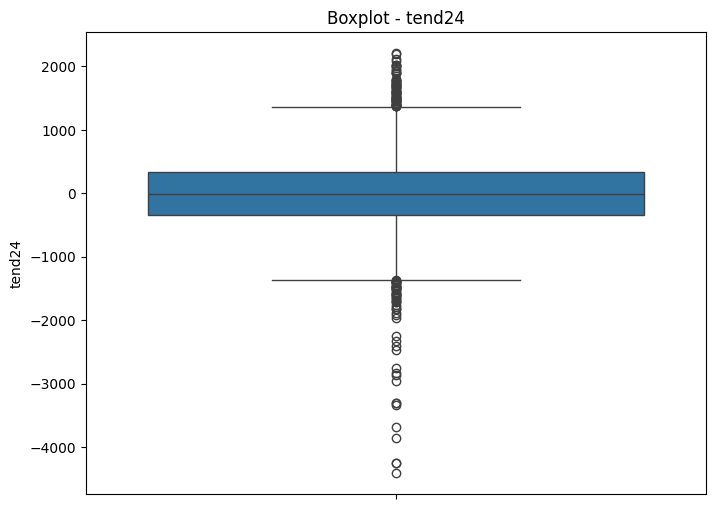

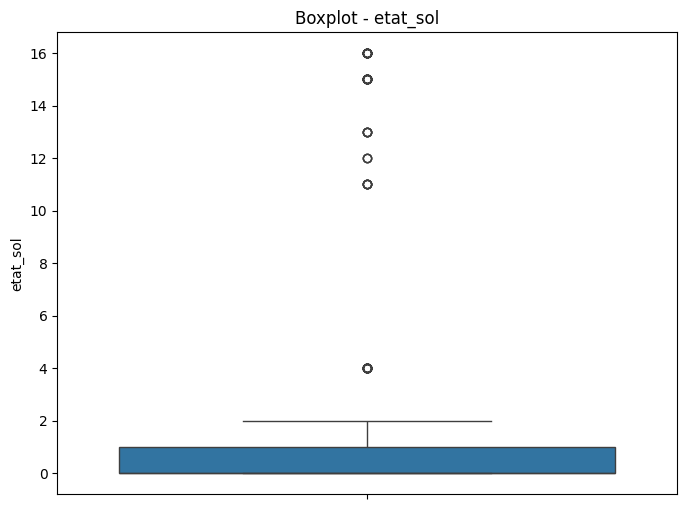

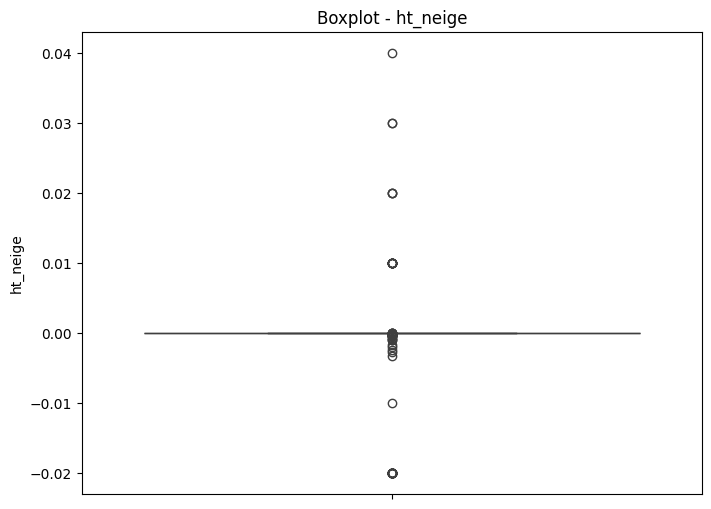

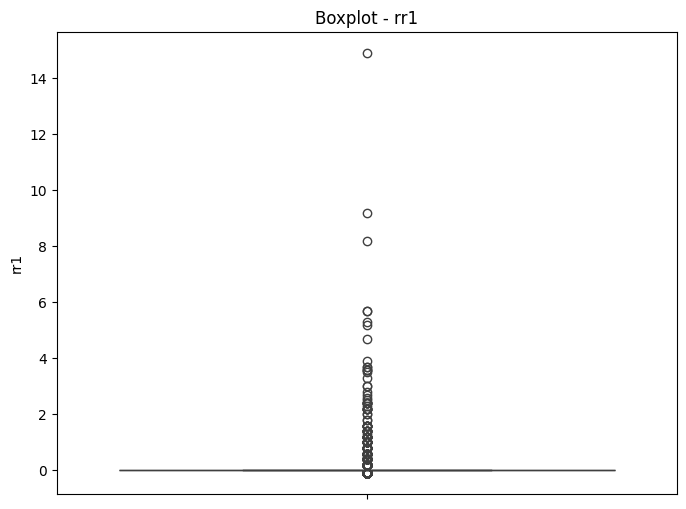

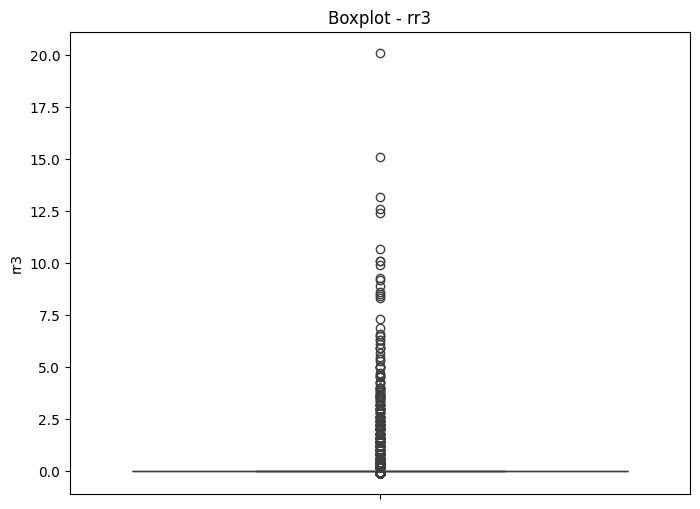

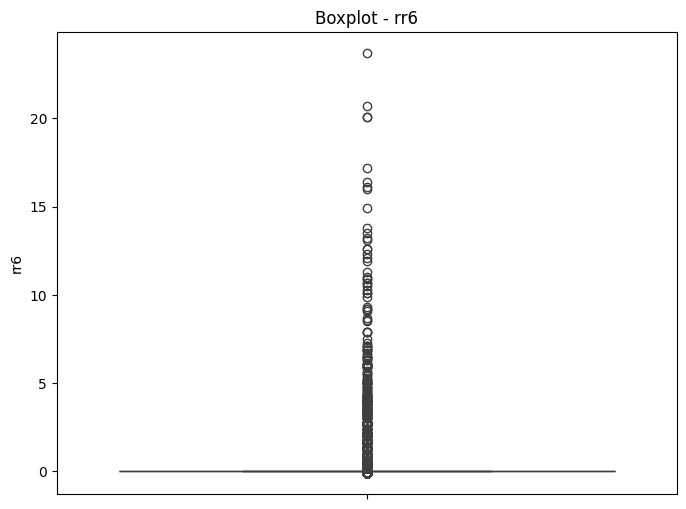

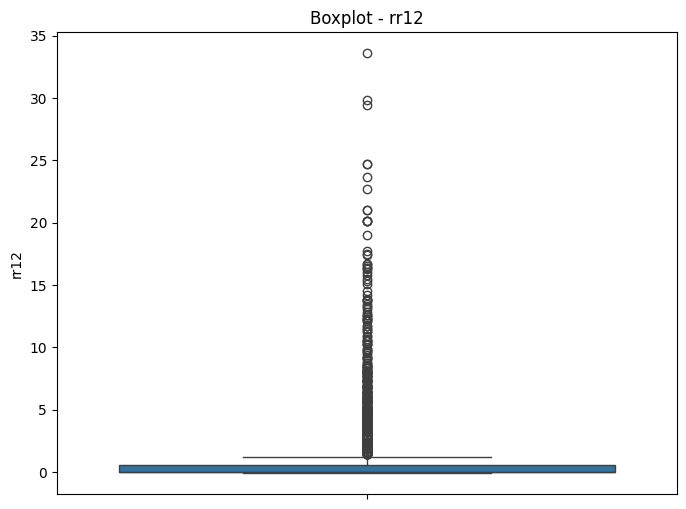

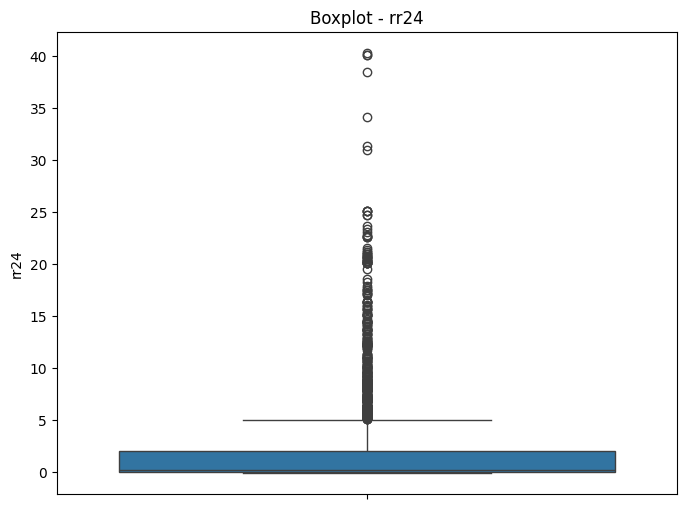

<Figure size 640x480 with 0 Axes>

In [48]:
columns_with_outliers = outlier_counts[outlier_counts > 0].index

# To visualize the outliers :
for col in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=external_data, y=col)
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


plt.tight_layout()
plt.show()

For ff : 
High wind speeds are unusual but possible in extreme weather conditions. Outliers may represent storms or strong winds.

for tend :
Significant pressure changes can happen due to rapid weather transitions, such as storm

for vv : 
High values are generally plausible unless they exceed realistic maximums. max here is 60,000m. 
-> one solution: to create a max : for values above 10,000m for example : leave 10,000m. Indeed, above this threshold, it will not make any difference on whether people would take a bike or not. 

On remarque que certaines variables ne sont pas vraiment des outliers : ex: rr1, rr3, rr6, rr12, rr24( qui correspondent au Cumuls de précipitations sur 1h, 3h, 6h, 12h, 24h (en mm)) : ces variables possèdent simplement une grande disparité de values car elles n'arrivent qu'occasionnellement et aveccdes quantité très disparates.

In [49]:
# We decide to replace negative values for the rr variables with 0
columns_to_modify = ["rr1", "rr3", "rr6", "rr12", "rr24"]

for col in columns_to_modify:
    external_data_cleaned.loc[external_data_cleaned[col] < 0, col] = 0

In [50]:
# For the vv variable : we decide (as explained above) to create a max value : values above 10,000m will be equal to 10,000m
external_data_cleaned.loc[external_data_cleaned["vv"] > 10000, "vv"] = 10000

In [51]:
external_data_cleaned.describe()

,date,tend,dd,ff,t,u,vv,ww,w1,w2,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,2021-03-27 18:37:39.482239488,-0.237809,184.379892,3.654154,285.877905,74.775135,9297.408188,9.056291,2.075256,1.759783,...,3.873871,100600.930163,-2.664058,0.670078,-0.000108,0.086635,0.250843,0.501445,0.999308,1.999518
min,2020-09-01 00:00:00,-750.000000,0.000000,0.000000,267.650000,24.000000,120.000000,0.000000,0.000000,0.000000,...,0.000000,96190.000000,-4410.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-12-13 18:45:00,-70.000000,80.000000,2.200000,280.950000,63.000000,10000.000000,1.000000,0.000000,0.000000,...,1.000000,100130.000000,-340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-03-27 19:30:00,0.000000,200.000000,3.400000,285.850000,79.000000,10000.000000,2.000000,2.000000,2.000000,...,4.000000,100750.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
75%,2021-07-09 17:15:00,70.000000,260.000000,4.900000,290.650000,89.000000,10000.000000,3.000000,2.000000,2.000000,...,7.000000,101200.000000,340.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.550000,2.000000
max,2021-10-21 12:00:00,720.000000,360.000000,14.600000,307.450000,100.000000,10000.000000,95.000000,9.000000,9.000000,...,9.000000,102790.000000,2210.000000,16.000000,0.040000,14.900000,20.100000,23.700000,33.600000,40.300000
std,NaN,122.191314,103.708084,2.000353,6.851700,17.022427,1889.204930,18.554513,2.163255,1.709240,...,3.071964,913.831886,615.813816,1.910557,0.002315,0.503611,1.056362,1.704749,2.706477,4.174655


## Creation of scores for groups of weather variables (ex : one group for wind features, another for rain features, ....)

We want to group the variables in groups and create a combination score for each group of variables. For this, we can use simple or weighted aggregation methods depending on the characteristics of the variables and their likely impact on the target (log_bike_count).

In [52]:
external_data_cleaned.head()

,date,tend,dd,ff,t,u,vv,ww,w1,w2,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
3082,2020-09-01 00:00:00,-10,340,1.6,285.75,81,10000,1,0.0,0.0,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3083,2020-09-01 03:00:00,-60,290,1.1,283.95,88,10000,2,0.0,0.0,...,0.0,100900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3084,2020-09-01 06:00:00,10,360,1.8,284.25,91,10000,3,0.0,0.0,...,1.0,100910,-60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,2020-09-01 09:00:00,0,360,2.9,291.25,60,10000,1,0.0,0.0,...,1.0,100910,-130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,2020-09-01 12:00:00,-110,40,2.6,293.95,44,10000,0,0.0,0.0,...,1.0,100800,-230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
external_data_cleaned.columns

Index(['date', 'tend', 'dd', 'ff', 't', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
       'nbas', 'pres', 'tend24', 'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24'],
      dtype='object')

In [54]:
# creation of a pressure score in hPA :
external_data_cleaned["pressure_score"] = (
    0.5 * external_data_cleaned["pres"]
    + 3 * external_data_cleaned["tend"]
    + 2 * external_data_cleaned["tend24"]
)


# we rename ff with wind speed :
external_data_cleaned.rename(columns={"ff": "wind_speed"}, inplace=True)

# we rename t with temperature :
external_data_cleaned.rename(columns={"t": "temperature"}, inplace=True)

# we rename vv with visibility :
external_data_cleaned.rename(columns={"vv": "visibility"}, inplace=True)

# we rename u with humidity :
external_data_cleaned.rename(columns={"u": "humidity"}, inplace=True)

# creation of a cloudiness score :
external_data_cleaned["nbas_percent"] = (
    external_data_cleaned["nbas"] / 8
) * 100  # nbas is in octas from 0 to 8
external_data_cleaned["cloudiness_score"] = (
    external_data_cleaned["n"] + external_data_cleaned["nbas_percent"]
)

# for ww, w1, w2 :
external_data_cleaned["weather_condition_score"] = (
    0.6 * external_data_cleaned["ww"]
    + 0.3 * external_data_cleaned["w1"]
    + 0.1 * external_data_cleaned["w2"]
)

# Precipitation score
external_data_cleaned["precipitation_score"] = (
    (0.4 * external_data_cleaned["rr1"])
    + (0.3 * external_data_cleaned["rr3"])
    + (0.2 * external_data_cleaned["rr6"])
    + (0.1 * external_data_cleaned["rr24"])
)

# we rename ht_neige to snow_score :
external_data_cleaned["snow_score"] = external_data_cleaned["ht_neige"]

In [55]:
external_data_cleaned.columns

Index(['date', 'tend', 'dd', 'wind_speed', 'temperature', 'humidity',
       'visibility', 'ww', 'w1', 'w2', 'n', 'nbas', 'pres', 'tend24',
       'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24',
       'pressure_score', 'nbas_percent', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

In [56]:
# Define the columns to remove
columns_to_remove = [
    "index",
    "tend",
    "dd",
    "ww",
    "w1",
    "w2",
    "n",
    "nbas",
    "nbas_percent",
    "pres",
    "tend24",
    "ht_neige",
    "rr1",
    "rr3",
    "rr6",
    "rr12",
    "rr24",
]

# Remove the columns
external_data_cleaned = external_data_cleaned.drop(
    columns=columns_to_remove, errors="ignore"
)

# Display the resulting DataFrame
external_data_cleaned.head()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
3082,2020-09-01 00:00:00,1.6,285.75,81,10000,0.0,50690.0,0.0,0.6,0.0,0.0
3083,2020-09-01 03:00:00,1.1,283.95,88,10000,0.0,50270.0,0.0,1.2,0.0,0.0
3084,2020-09-01 06:00:00,1.8,284.25,91,10000,0.0,50365.0,22.5,1.8,0.0,0.0
3085,2020-09-01 09:00:00,2.9,291.25,60,10000,0.0,50195.0,37.5,0.6,0.0,0.0
3086,2020-09-01 12:00:00,2.6,293.95,44,10000,0.0,49610.0,102.5,0.0,0.0,0.0


In [57]:
external_data_cleaned.describe()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,2021-03-27 18:37:39.482239488,3.654154,285.877905,74.775135,9297.408188,0.670078,50294.423540,114.800873,6.232330,0.410148,-0.000108
min,2020-09-01 00:00:00,0.000000,267.650000,24.000000,120.000000,0.000000,37925.000000,0.000000,0.000000,0.000000,-0.020000
25%,2020-12-13 18:45:00,2.200000,280.950000,63.000000,10000.000000,0.000000,49475.000000,50.000000,1.200000,0.000000,0.000000
50%,2021-03-27 19:30:00,3.400000,285.850000,79.000000,10000.000000,0.000000,50375.000000,127.500000,1.800000,0.020000,0.000000
75%,2021-07-09 17:15:00,4.900000,290.650000,89.000000,10000.000000,1.000000,51235.000000,177.500000,2.600000,0.340000,0.000000
max,2021-10-21 12:00:00,14.600000,307.450000,100.000000,10000.000000,16.000000,55400.000000,213.500000,60.600000,17.600000,0.040000
std,NaN,2.000353,6.851700,17.022427,1889.204930,1.910557,1644.247674,69.241982,11.738611,1.044249,0.002315


In [58]:
external_data_cleaned.columns

Index(['date', 'wind_speed', 'temperature', 'humidity', 'visibility',
       'etat_sol', 'pressure_score', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

We can see that Ddifferent scores have widely varying ranges. For instance, pressure_score ranges from 37,925 to 55,400, while precipitation_score ranges from 0 to 17.6. 

Solution: we are going to normalize them to bring all scores to a common scale. 

using the z-score method : we center scores around 0

In [59]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = [
    "wind_speed",
    "etat_sol",
    "humidity",
    "visibility",
    "pressure_score",
    "cloudiness_score",
    "weather_condition_score",
    "precipitation_score",
    "snow_score",
]

scaler = StandardScaler()

external_data_cleaned[columns_to_normalize] = scaler.fit_transform(
    external_data_cleaned[columns_to_normalize]
)

external_data_cleaned.describe()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
count,3322,3.322000e+03,3322.000000,3.322000e+03,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03
mean,2021-03-27 18:37:39.482239488,3.080017e-16,285.877905,2.737793e-16,0.000000,1.711120e-17,9.346995e-16,3.422241e-17,-1.197784e-16,-1.497230e-17,-1.283340e-17
min,2020-09-01 00:00:00,-1.827030e+00,267.650000,-2.983287e+00,-4.858546,-3.507769e-01,-7.523979e+00,-1.658216e+00,-5.310056e-01,-3.928272e-01,-8.594042e+00
25%,2020-12-13 18:45:00,-7.270582e-01,280.950000,-6.918466e-01,0.371954,-3.507769e-01,-4.984328e-01,-9.360019e-01,-4.287634e-01,-3.928272e-01,4.679043e-02
50%,2021-03-27 19:30:00,-1.270738e-01,285.850000,2.482314e-01,0.371954,-3.507769e-01,4.901244e-02,1.834297e-01,-3.776424e-01,-3.736718e-01,4.679043e-02
75%,2021-07-09 17:15:00,6.229068e-01,290.650000,8.357801e-01,0.371954,1.727095e-01,5.721267e-01,9.056437e-01,-3.094810e-01,-6.718521e-02,4.679043e-02
max,2021-10-21 12:00:00,5.472781e+00,307.450000,1.482084e+00,0.371954,8.025006e+00,3.105581e+00,1.425638e+00,4.632222e+00,1.646393e+01,1.732846e+01
std,NaN,1.000151e+00,6.851700,1.000151e+00,1.000151,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00


In [60]:
external_data_cleaned.columns

Index(['date', 'wind_speed', 'temperature', 'humidity', 'visibility',
       'etat_sol', 'pressure_score', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

In [61]:
external_data_cleaned.to_csv(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/external_data_cleaned.csv",
    index=False,
)

### **EDA of External Data : jour fériés data**

In [12]:
jour_feries = pd.read_csv(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/jours_feries_metropole.csv",
    date_format="%Y%m%d%H",
)

In [13]:
jour_feries.head()

,date,annee,zone,nom_jour_ferie
0,2004-01-01,2004,Métropole,1er janvier
1,2004-04-12,2004,Métropole,Lundi de Pâques
2,2004-05-01,2004,Métropole,1er mai
3,2004-05-08,2004,Métropole,8 mai
4,2004-05-20,2004,Métropole,Ascension


In [6]:
jour_feries.shape

(286, 4)

In [14]:
jour_feries.dtypes

date              object
annee              int64
zone              object
nom_jour_ferie    object
dtype: object

In [9]:
jour_feries.nunique()

date              285
annee              26
zone                1
nom_jour_ferie     11
dtype: int64

In [16]:
jour_feries = jour_feries.drop(columns=["annee", "zone"])


In [18]:
jour_feries['date'] = pd.to_datetime(jour_feries['date'])

In [19]:
jour_feries = jour_feries[
    (jour_feries["date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (jour_feries["date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [20]:
jour_feries.nunique()

date              11
nom_jour_ferie    11
dtype: int64

### **EDA of External Data : mouvements sociaux data**

In [45]:
mouvements_sociaux = pd.read_csv(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/mouvements-sociaux-depuis-2002.csv",
    date_format="%Y%m%d%H",
    sep=";"
)

In [46]:
mouvements_sociaux.head()

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
0,2003-04-02,2003-04-04,Participation aux manifestations sur les retra...,"CGT,UNSA,SUD Rail,CFDT,FO","conducteur,agent de manoeuvre,chef de bord,acc...",138412.0,41307.0,29.8
1,2003-05-13,NaN,Rejette toute idée d'allongement de la durée d...,SUD Rail,"conducteur,agent de manoeuvre,chef de bord,acc...",121868.0,31172.0,25.6
2,2003-06-10,NaN,Retraites et salaires.,"CGT,CFDT,FO","conducteur,agent de manoeuvre,chef de bord,acc...",54754.0,8336.0,15.2
3,2004-05-25,2004-05-25,Revendications portant sur les personnels PS25...,SUD Rail,"conducteur,agent de manoeuvre,chef de bord,acc...",125964.0,261.0,0.2
4,2004-09-08,2004-09-10,"Effectifs, conditions de travail, travail de n...",FO,infrastructure,9666.0,488.0,5.0


In [30]:
mouvements_sociaux['Date'] = pd.to_datetime(mouvements_sociaux['Date'])

In [31]:
mouvements_sociaux = mouvements_sociaux[
    (mouvements_sociaux["Date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (mouvements_sociaux["Date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [34]:
df_train["date"].min()

Timestamp('2020-09-01 01:00:00')

In [36]:
df_test["date"].min()

Timestamp('2021-09-10 01:00:00')

In [32]:
mouvements_sociaux.shape

(5, 8)

In [33]:
mouvements_sociaux

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,NaN,"Salaires, Fret, emploi…","CGT,SUD Rail",NaN,NaN,NaN,11.0
267,2021-03-08,NaN,Journée internationale du droit des femmes,"CGT,SUD Rail",NaN,NaN,NaN,0.7
364,2020-09-17,NaN,Mouvement de rentrée,"CGT,SUD Rail",NaN,NaN,NaN,7.0
456,2021-02-04,NaN,"Crise sanitaire, salaire, recrutement…","CGT,SUD Rail",NaN,NaN,NaN,3.2
457,2021-07-01,NaN,"Emploi, réorganisations, salaires...",CGT,NaN,NaN,NaN,7.4


In [38]:
# no mouvement social for dates corresponding to the test set

# we remove the second raw corresponding to the 2021-03-08 because taux de gréviste = 0.7% which is very little
mouvements_sociaux = mouvements_sociaux[mouvements_sociaux['Date'] != pd.Timestamp('2021-03-08')]


In [39]:
mouvements_sociaux

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,NaN,"Salaires, Fret, emploi…","CGT,SUD Rail",NaN,NaN,NaN,11.0
364,2020-09-17,NaN,Mouvement de rentrée,"CGT,SUD Rail",NaN,NaN,NaN,7.0
456,2021-02-04,NaN,"Crise sanitaire, salaire, recrutement…","CGT,SUD Rail",NaN,NaN,NaN,3.2
457,2021-07-01,NaN,"Emploi, réorganisations, salaires...",CGT,NaN,NaN,NaN,7.4


In [41]:
mouvements_sociaux = mouvements_sociaux.drop(columns=['date_de_fin', 'Organisations syndicales', 'Métiers ciblés par le préavis', 'Population devant travailler ciblee par le préavis', 'Nombre de grévistes du préavis'])

In [42]:
mouvements_sociaux

,Date,Motif exprimé,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,"Salaires, Fret, emploi…",11.0
364,2020-09-17,Mouvement de rentrée,7.0
456,2021-02-04,"Crise sanitaire, salaire, recrutement…",3.2
457,2021-07-01,"Emploi, réorganisations, salaires...",7.4
